In [33]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

# CONVERTING IMAGE TO GRAY SCALE

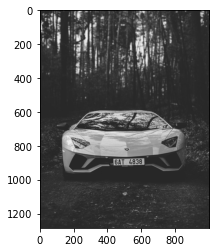

In [49]:
img = cv2.imread('a.jfif')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

# APPLY FILTER AND EGDE DETECTION

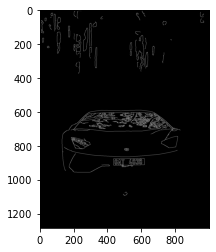

In [50]:
bfilter = cv2.bilateralFilter(gray,11,117,17) #noise reduction
edged = cv2.Canny(bfilter,30,200) #edge datection
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

# FIND CONTOURS AND APPLY MASK

In [51]:
keypoints = cv2.findContours(edged.copy(),cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours , key = cv2.contourArea, reverse = True )[:10]

In [52]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour,10,True)
    if len(approx)==4:
        location = approx
        break
        


In [53]:
location

array([[[613, 876]],

       [[612, 912]],

       [[432, 912]],

       [[434, 876]]], dtype=int32)

In [54]:
mask = np.zeros(gray.shape , np.uint8)
new_image = cv2.drawContours(mask , [location],0,255,-1)
new_image = cv2.bitwise_and(img,img,mask = mask)

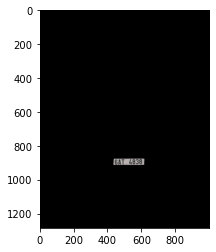

In [55]:
plt.imshow(new_image)

In [56]:
(x,y) = np.where(mask==255)
(x1,y1) = (np.min(x),np.min(y))
(x2,y2) = (np.max(x),np.max(y))
crop_img = gray[x1:x2+1,y1:y2+1]

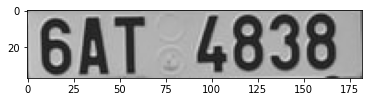

In [57]:
plt.imshow(cv2.cvtColor(crop_img,cv2.COLOR_BGR2RGB))

# EASY OCR TO READ TEXT

In [58]:
reader = easyocr.Reader(['en'])
result = reader.readtext(crop_img)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[1, 0], [71, 0], [71, 37], [1, 37]], '6AT', 0.7757367017294896),
 ([[85, 0], [175, 0], [175, 37], [85, 37]], '4838', 0.9998489022254944)]

# PLOT THE DETECTION

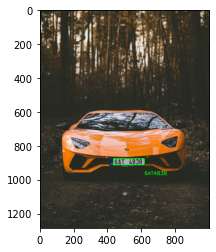

In [59]:
text = result[0][-2] + result[1][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img , text = text , org = (approx[0][0][0] ,approx[1][0][1]+60),fontFace = font ,fontScale= 1 , color = (0,255,0),thickness = 2 ,lineType = 2,bottomLeftOrigin = False)
res = cv2.rectangle(img, tuple(approx[0][0]) , tuple(approx[2][0]) , (0,255,0) , 3)
plt.imshow(cv2.cvtColor(res , cv2.COLOR_BGR2RGB))